# 深度学习100例-卷积神经网络（CNN）实现mnist手写数字识别 | 第1天

## 1.前期准备

### 1.1导入数据

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

### 1.2归一化

In [2]:
# 将像素的值标准化至0到1的区间内。
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape
"""
输出：((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))
"""

'\n输出：((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))\n'

### 1.3可视化图片

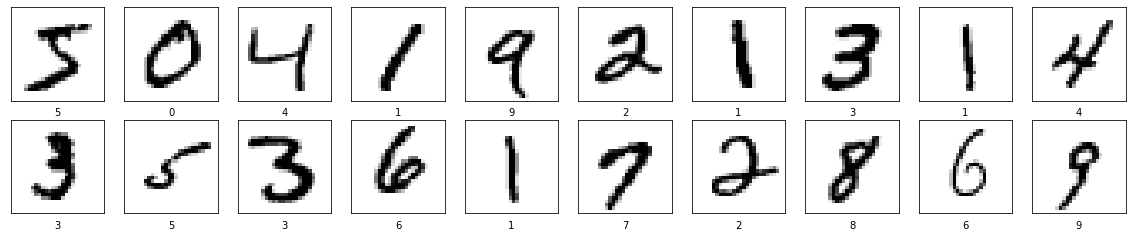

In [3]:
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

### 1.4调整图片格式

In [4]:
#调整数据到我们需要的格式
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape
"""
输出：((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))
"""

'\n输出：((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))\n'

## 2.构建CNN网络模型

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),#卷积层1，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层1，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层2，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层2，2*2采样
    
    layers.Flatten(),                              #Flatten层，连接卷积层与全连接层
    layers.Dense(64, activation='relu'),		   #全连接层，特征进一步提取
    layers.Dense(10)                               #输出层，输出预期结果
])
# 打印网络结构
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

## 3.编译模型

In [6]:
"""
这里设置优化器、损失函数以及metrics
这三者具体介绍可参考我的博客：
https://blog.csdn.net/qq_38251616/category_10258234.html
"""
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 4.训练模型

In [7]:
"""
这里设置输入训练数据集（图片及标签）、验证数据集（图片及标签）以及迭代次数epochs
关于model.fit()函数的具体介绍可参考我的博客：
https://blog.csdn.net/qq_38251616/category_10258234.html
"""
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1398 - accuracy: 0.9583 - val_loss: 0.0444 - val_accuracy: 0.9862
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0364 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0290 - val_accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0468 - val_accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0270 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0244 - val_accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.0368 -

## 5.预测

313/313 [==============================] - 1s 3ms/step
[-19.424093   -14.651355   -15.31765     -3.2354898    6.8872514
  -6.696597   -26.477327     0.62189054   1.0967858   25.696323  ]
(array([9], dtype=int64),)


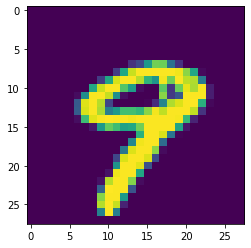

In [8]:
plt.imshow(test_images[9])

# 输出测试集中第一张图片的预测结果
pre = model.predict(test_images) # 对所有测试图片进行预测
a = pre[9] # 输出第一张图片的预测结果
print(a)
# 输出结果：为0-9中每一个数字的几率，out数字越大可能性越大
print(np.where(a==np.max(a)))